In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# first we generate a 450x450 pixel image with varying frequency content
n = 450
x = np.arange(n) / n - 0.5
y = np.arange(n) / n - 0.5
aa = np.ones((n, n))
aa[::2, :] = -1

In [3]:
x, y = np.meshgrid(x, y)
r = np.sqrt(x ** 2 + y ** 2)
f0 = 5
k = 100
a = np.sin(np.pi * 2 * (f0 * r + k * r ** 2 / 2))

# make the left hand side of this
a[:int(n / 2), :][r[:int(n / 2), :] < 0.4] = -1
a[:int(n / 2), :][r[:int(n / 2), :] < 0.3] = 1
aa[:, int(n / 3):] = a[:, int(n / 3):]
a = aa

In [4]:
interpolations = ["nearest", "antialiased", "antialiased"]
spaces = ["data" ,"data", "rgba"]

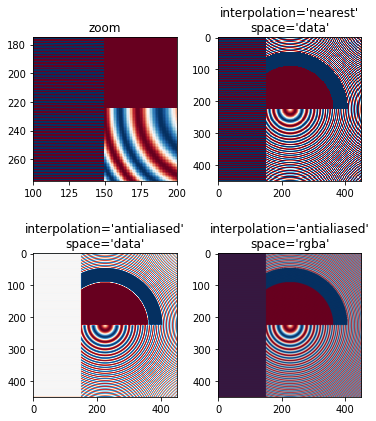

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(5, 6), constrained_layout=True)

axs[0, 0].imshow(a, interpolation="nearest", cmap="RdBu_r")
axs[0, 0].set_xlim(100, 200)
axs[0, 0].set_ylim(275, 175)
axs[0, 0].set_title("zoom")

for ax, interp, space in zip(axs.flat[1:], interpolations, spaces):
    ax.imshow(a, interpolation=interp, interpolation_stage=space, cmap="RdBu_r")
    ax.set_title(f"interpolation='{interp}'\nspace='{space}'")

plt.show()

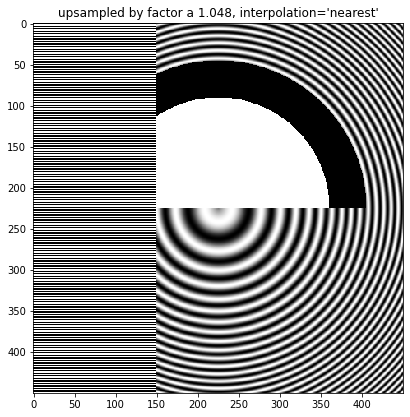

In [6]:
fig, ax = plt.subplots(figsize=(6.8, 6.8))

ax.imshow(a, interpolation="nearest", cmap="gray")
ax.set_title("upsampled by factor a 1.048, interpolation='nearest'")
plt.show()

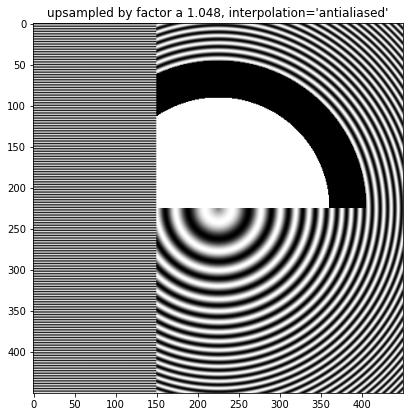

In [7]:
fig, ax = plt.subplots(figsize=(6.8, 6.8))

ax.imshow(a, interpolation="antialiased", cmap="gray")
ax.set_title("upsampled by factor a 1.048, interpolation='antialiased'")
plt.show()

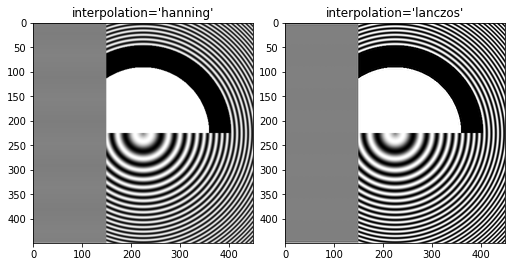

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(7, 4), constrained_layout=True)

for ax, interp in zip(axs, ["hanning", "lanczos"]):
    ax.imshow(a, interpolation=interp, cmap="gray")
    ax.set_title(f"interpolation='{interp}'")

plt.show()